# Europe Top 5 League 2024/2025 Player Of The season

This project aims to identify the most deserving football player to be named the Player of the Season 2024/2025 using data analytics and the IBM Granite large language model (LLM). Rather than relying on subjective opinions, I use an objective, data-driven analysis based on player performance statistics from the 2024/2025 season.

In [421]:
!pip install langchain_community
!pip install replicate

In [422]:
import os
from google.colab import userdata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

api_token = userdata.get("api_token")
os.environ["REPLICATE_API_TOKEN"] = api_token

In [423]:
from langchain_community.llms import Replicate

# Define parameters
parameters = {
  "top_k": 5,
  "top_p": 1.0,
  "max_tokens": 10000,
  "min_tokens": 0,
  "random_seed": None,
  "repetition_penalty": 1.0,
  "temperature": 0.7,
  "stopping_criteria": "length (256 tokens)",
  "stopping_sequence": None
}

# Define the model
llm = Replicate(
  model="ibm-granite/granite-3.3-8b-instruct",
  input=parameters
)

**Basic Player Information:**

Player– Player's name

Nation – Player's nationality

Pos – Position (FW, MF, DF, GK)

Squad – Club name

Comp – League

Age – Age of the player

Born – Year of birth

**Playing Time & Appearances**

MP – Matches played

Starts – Games started

Min – Minutes played

90s – Number of full 90-minute matches played

**Attacking Stats**

Gls – Goals scored

Ast – Assists provided

G+A – Goals + Assists

xG – Expected goals

xAG – Expected assists

npxG – Non-penalty expected goals

G-PK – Goals excluding penalties

**Defensive Stats**

Tkl – Total tackles

TklW – Tackles won

Blocks – Blocks made

Int – Interceptions

Tkl+Int – Combined tackles and interceptions

Clr – Clearances

Err – Errors leading to goals

**Passing & Creativity Stats**

PrgP – Progressive passes

PrgC – Progressive carries

KP – Key passes (passes leading to a shot)

Cmp%_stats_passing – Pass completion percentage

Ast_stats_passing – Assists

xA – Expected assists

PPA – Passes into the penalty area

**Goalkeeping Stats**

GA – Goals conceded

Saves – Saves made

Save% – Save percentage

CS – Clean sheets

CS% – Clean sheet percentage

PKA – Penalties faced

PKsv – Penalty saves

**Possession & Ball Control**

Touches – Total touches of the ball

Carries – Total ball carries

PrgR – Progressive runs (carries moving the ball forward significantly)

Mis – Miscontrols

Dis – Times dispossessed

**Miscellaneous Stats**

CrdY – Yellow cards

CrdR – Red cards

PKwon – Penalties won

PKcon – Penalties conceded

Recov – Ball recoveries

In [424]:
df = pd.read_csv("/content/players_data-2024_2025.csv")
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,G+A-PK,xG+xAG,Rk_stats_shooting,Nation_stats_shooting,Pos_stats_shooting,Comp_stats_shooting,Age_stats_shooting,Born_stats_shooting,90s_stats_shooting,Gls_stats_shooting,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK_stats_shooting,PKatt_stats_shooting,xG_stats_shooting,npxG_stats_shooting,npxG/Sh,G-xG,np:G-xG,Rk_stats_passing,Nation_stats_passing,Pos_stats_passing,Comp_stats_passing,Age_stats_passing,Born_stats_passing,90s_stats_passing,Cmp,Att,Cmp%,TotDist,PrgDist,Ast_stats_passing,xAG_stats_passing,xA,A-xAG,KP,1/3,PPA,CrsPA,PrgP_stats_passing,Rk_stats_passing_types,Nation_stats_passing_types,Pos_stats_passing_types,Comp_stats_passing_types,Age_stats_passing_types,Born_stats_passing_types,90s_stats_passing_types,Att_stats_passing_types,Live,Dead,FK_stats_passing_types,TB,Sw,Crs,TI,CK,In,Out,Str,Cmp_stats_passing_types,Off,Blocks,Rk_stats_gca,Nation_stats_gca,Pos_stats_gca,Comp_stats_gca,Age_stats_gca,Born_stats_gca,90s_stats_gca,SCA,SCA90,PassLive,PassDead,TO,Sh_stats_gca,Fld,Def,GCA,GCA90,Rk_stats_defense,Nation_stats_defense,Pos_stats_defense,Comp_stats_defense,Age_stats_defense,Born_stats_defense,90s_stats_defense,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Att_stats_defense,Tkl%,Lost,Blocks_stats_defense,Sh_stats_defense,Pass,Int,Tkl+Int,Clr,Err,Rk_stats_possession,Nation_stats_possession,Pos_stats_possession,Comp_stats_possession,Age_stats_possession,Born_stats_possession,90s_stats_possession,Touches,Def Pen,Def 3rd_stats_possession,Mid 3rd_stats_possession,Att 3rd_stats_possession,Att Pen,Live_stats_possession,Att_stats_possession,Succ,Succ%,Tkld,Tkld%,Carries,TotDist_stats_possession,PrgDist_stats_possession,PrgC_stats_possession,1/3_stats_possession,CPA,Mis,Dis,Rec,PrgR_stats_possession,Rk_stats_playing_time,Nation_stats_playing_time,Pos_stats_playing_time,Comp_stats_playing_time,Age_stats_playing_time,Born_stats_playing_time,MP_stats_playing_time,Min_stats_playing_time,Mn/MP,Min%,90s_stats_playing_time,Starts_stats_playing_time,Mn/Start,Compl,Subs,Mn/Sub,unSub,PPM,onG,onGA,+/-,+/-90,On-Off,onxG,onxGA,xG+/-,xG+/-90,Rk_stats_misc,Nation_stats_misc,Pos_stats_misc,Comp_stats_misc,Age_stats_misc,Born_stats_misc,90s_stats_misc,CrdY_stats_misc,CrdR_stats_misc,2CrdY,Fls,Fld_stats_misc,Off_stats_misc,Crs_stats_misc,Int_stats_misc,TklW_stats_misc,PKwon,PKcon,OG,Recov,Won,Lost_stats_misc,Won%,Rk_stats_keeper,Nation_stats_keeper,Pos_stats_keeper,Comp_stats_keeper,Age_stats_keeper,Born_stats_keeper,MP_stats_keeper,Starts_stats_keeper,Min_stats_keeper,90s_stats_keeper,GA,GA90,SoTA,Saves,Save%,W,D,L,CS,CS%,PKatt_stats_keeper,PKA,PKsv,PKm,Rk_stats_keeper_adv,Nation_stats_keeper_adv,Pos_stats_keeper_adv,Comp_stats_keeper_adv,Age_stats_keeper_adv,Born_stats_keeper_adv,90s_stats_keeper_adv,GA_stats_keeper_adv,PKA_stats_keeper_adv,FK_stats_keeper_adv,CK_stats_keeper_adv,OG_stats_keeper_adv,PSxG,PSxG/SoT,PSxG+/-,/90,Cmp_stats_keeper_adv,Att_stats_keeper_adv,Cmp%_stats_keeper_adv,Att (GK),Thr,Launch%,AvgLen,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24.0,2000.0,3,1,86,1.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1,8,3,0.0,0.00,1,eng ENG,DF,eng Premier League,24.0,2000.0,1.0,0,0,0,NaN,0.00,0.0,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,1,eng ENG,DF,eng Premier League,24.0,2000.0,1.0,50,63,79.4,887,361,0,0.0,0.0,0.0,0,8,0,0,8,1,eng ENG,DF,eng Premier League,24.0,2000.0,1.0,63,51,12,2,0,0,2,10,0,0,0,0,50,0,1,1,eng ENG,DF,eng Premier League,24.0,2000.0,1.0,2,2.09,2,0,0,0,0,0,0,0.0,1,eng ENG,DF,eng Premier League,24.0,2000.0,1.0,2,2,1,1,0,1,100.0,0,3,1,2,1,3,0,0,1,eng ENG,DF,eng Premier League,24.0,2000.0,1.0,73,2,19,40,15,0,73,2,0,0.0,1,50.0,41,152,68,1,0,0,1,0,40,3,1,eng ENG,DF,eng Premier League,24.0,2000.0,3,86,29,2.5,1.0,1,61.0,0,2,13.0,11,0.67,2,0,2,2.09,1.82,2.3,0.3,2.0,2.12,1,eng ENG,DF,eng Premier League,24.0,2000.0,1.0,0,0,0,0,2,0,2,1,2,0,0,0,7,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Categorizing players based on their positions

In [425]:
forwards = df[df['Pos'].astype(str).str.split(',').str[0] == 'FW'].copy()
midfielders = df[df['Pos'].astype(str).str.split(',').str[0] == 'MF'].copy()
defenders = df[df['Pos'].astype(str).str.split(',').str[0] == 'DF'].copy()
goalkeepers = df[df['Pos'].astype(str).str.split(',').str[0] == 'GK'].copy()

print("Forwards:")
print(forwards)
print("\nMidfielders:")
print(midfielders)
print("\nDefenders:")
print(defenders)
print("\nGoalkeepers:")
print(goalkeepers)

Forwards:
        Rk             Player   Nation    Pos           Squad  \
4        5  Keyliane Abdallah   fr FRA     FW       Marseille   
13      14     Matthis Abline   fr FRA     FW          Nantes   
17      18      Tammy Abraham  eng ENG     FW            Roma   
18      19      Tammy Abraham  eng ENG     FW           Milan   
22      23         Akor Adams   ng NGA     FW         Sevilla   
...    ...                ...      ...    ...             ...   
2837  2838      Edon Zhegrova   xk KVX  FW,MF           Lille   
2841  2842     Joshua Zirkzee   nl NED  FW,MF  Manchester Utd   
2842  2843    Budu Zivzivadze   ge GEO     FW      Heidenheim   
2852  2853        Milan Đurić   ba BIH     FW           Monza   
2853  2854        Milan Đurić   ba BIH     FW           Parma   

                    Comp   Age    Born  MP  Starts   Min   90s  Gls  Ast  G+A  \
4             fr Ligue 1  18.0  2006.0   1       0     3   0.0    0    0    0   
13            fr Ligue 1  21.0  2003.0  34     

Data normalization

In [426]:
from sklearn.preprocessing import MinMaxScaler

forward_cols = ['Gls', 'xG', 'Ast', 'xAG', 'Carries', 'PrgR', 'Dis', 'PKwon', 'CrdY', 'CrdR']
midfielder_cols = ['Ast', 'xAG', 'KP', 'PPA', 'PrgP', 'Carries', 'PrgR', 'TklW', 'Int', 'Recov', 'Mis', 'CrdY', 'CrdR']
defender_cols = ['Tkl', 'TklW', 'Blocks', 'Int', 'Clr', 'Err', 'PrgC', 'Recov', 'CrdY', 'CrdR']
goalkeeper_cols = ['GA', 'Saves', 'Save%', 'CS', 'CS%', 'Err', 'CrdY', 'CrdR']

scaler = MinMaxScaler()

forwards_normalized = forwards.copy()
forwards_normalized[forward_cols] = scaler.fit_transform(forwards_normalized[forward_cols])

midfielders_normalized = midfielders.copy()
midfielders_normalized[midfielder_cols] = scaler.fit_transform(midfielders_normalized[midfielder_cols])

defenders_normalized = defenders.copy()
defenders_normalized[defender_cols] = scaler.fit_transform(defenders_normalized[defender_cols])

goalkeepers_normalized = goalkeepers.copy()
goalkeepers_normalized[goalkeeper_cols] = scaler.fit_transform(goalkeepers_normalized[goalkeeper_cols])

print("Forwards Normalized:")
print(forwards_normalized.head())
print("\nMidfielders Normalized:")
print(midfielders_normalized.head())
print("\nDefenders Normalized:")
print(defenders_normalized.head())
print("\nGoalkeepers Normalized:")
print(goalkeepers_normalized.head())

Forwards Normalized:
    Rk             Player   Nation Pos      Squad        Comp   Age    Born  \
4    5  Keyliane Abdallah   fr FRA  FW  Marseille  fr Ligue 1  18.0  2006.0   
13  14     Matthis Abline   fr FRA  FW     Nantes  fr Ligue 1  21.0  2003.0   
17  18      Tammy Abraham  eng ENG  FW       Roma  it Serie A  26.0  1997.0   
18  19      Tammy Abraham  eng ENG  FW      Milan  it Serie A  26.0  1997.0   
22  23         Akor Adams   ng NGA  FW    Sevilla  es La Liga  24.0  2000.0   

    MP  Starts   Min   90s       Gls       Ast  G+A  G-PK  PK  PKatt  \
4    1       0     3   0.0  0.000000  0.000000    0     0   0      0   
13  34      33  2768  30.8  0.290323  0.111111   11     8   1      1   
17   1       0     1   0.0  0.000000  0.000000    0     0   0      0   
18  28      12  1183  13.1  0.096774  0.222222    7     2   1      2   
22   4       1   134   1.5  0.000000  0.000000    0     0   0      0   

        CrdY  CrdR        xG  npxG       xAG  npxG+xAG  PrgC  PrgP     

Top 50 forwards with the most G+A

In [427]:
top_forwards = forwards_normalized.sort_values(by='G+A', ascending=False).head(50)
print("\nTop 50 Forwards by Goals + Assists:")
print(top_forwards[['Player', 'Squad', 'Comp', 'Pos', 'Min', 'Gls', 'xG', 'Ast', 'xAG', 'G+A', 'Carries', 'PrgR', 'Dis', 'PKwon', 'CrdY', 'CrdR']])



Top 50 Forwards by Goals + Assists:
                    Player            Squad                Comp    Pos   Min  \
2304         Mohamed Salah        Liverpool  eng Premier League     FW  3371   
1317            Harry Kane    Bayern Munich       de Bundesliga     FW  2381   
1691         Kylian Mbappé      Real Madrid          es La Liga     FW  2907   
2201         Mateo Retegui         Atalanta          it Serie A     FW  2383   
1219        Alexander Isak    Newcastle Utd  eng Premier League     FW  2756   
1483    Robert Lewandowski        Barcelona          es La Liga     FW  2667   
1960         Michael Olise    Bayern Munich       de Bundesliga  FW,MF  2334   
2177              Raphinha        Barcelona          es La Liga  FW,MF  2839   
1693          Bryan Mbeumo        Brentford  eng Premier League     FW  3414   
697        Ousmane Dembélé        Paris S-G          fr Ligue 1     FW  1730   
1060       Mason Greenwood        Marseille          fr Ligue 1  FW,MF  2804   
405

In [457]:
top_forwards_display = top_forwards[['Player', 'Squad', 'Comp', 'Pos', 'Min', 'Gls', 'xG', 'Ast', 'xAG', 'G+A', 'Carries', 'PrgR', 'Dis', 'PKwon', 'CrdY', 'CrdR']]
print("\nTabel Top 50 Forwards by Goals + Assists:")
display(top_forwards_display)


Tabel Top 50 Forwards by Goals + Assists:


,Player,Squad,Comp,Pos,Min,Gls,xG,Ast,xAG,G+A,Carries,PrgR,Dis,PKwon,CrdY,CrdR
2304,Mohamed Salah,Liverpool,eng Premier League,FW,3371,0.935484,0.929889,1.000000,1.000000,47,0.773217,1.000000,0.712766,0.000000,0.083333,0.0
1317,Harry Kane,Bayern Munich,de Bundesliga,FW,2381,0.838710,0.749077,0.500000,0.373239,35,0.345222,0.293033,0.234043,0.333333,0.416667,0.0
1691,Kylian Mbappé,Real Madrid,es La Liga,FW,2907,1.000000,0.955720,0.166667,0.542254,34,0.716689,0.790984,0.521277,0.500000,0.250000,0.5
2201,Mateo Retegui,Atalanta,it Serie A,FW,2383,0.806452,0.697417,0.444444,0.345070,33,0.374832,0.407787,0.510638,0.333333,0.250000,0.0
1219,Alexander Isak,Newcastle Utd,eng Premier League,FW,2756,0.741935,0.749077,0.333333,0.302817,29,0.413863,0.444672,0.585106,0.166667,0.083333,0.0
1483,Robert Lewandowski,Barcelona,es La Liga,FW,2667,0.870968,1.000000,0.111111,0.161972,29,0.317631,0.336066,0.478723,0.000000,0.083333,0.0
1960,Michael Olise,Bayern Munich,de Bundesliga,"FW,MF",2334,0.387097,0.357934,0.833333,0.845070,27,0.878197,0.780738,0.308511,0.333333,0.250000,0.0
2177,Raphinha,Barcelona,es La Liga,"FW,MF",2839,0.580645,0.708487,0.500000,0.894366,27,0.683715,0.715164,0.308511,0.333333,0.333333,0.0
1693,Bryan Mbeumo,Brentford,eng Premier League,FW,3414,0.645161,0.453875,0.388889,0.584507,27,0.724764,0.719262,0.500000,0.000000,0.250000,0.0
697,Ousmane Dembélé,Paris S-G,fr Ligue 1,FW,1730,0.677419,0.612546,0.333333,0.577465,27,0.590848,0.516393,0.340426,0.166667,0.083333,0.0


Top 50 midfielders with the most G+A

In [428]:
top_midfielders = midfielders_normalized.sort_values(by='G+A', ascending=False).head(50)
print("\nTop 50 Midfielders by Goals + Assist:")
print(top_midfielders[['Player', 'Squad', 'Comp', 'Pos', 'Min', 'Ast', 'xAG', 'KP', 'PPA', 'PrgP', 'Carries', 'PrgR', 'TklW', 'Int', 'Recov', 'Mis', 'CrdY', 'CrdR']])


Top 50 Midfielders by Goals + Assist:
                     Player            Squad                Comp    Pos   Min  \
2033            Cole Palmer          Chelsea  eng Premier League  MF,FW  3191   
2779          Florian Wirtz       Leverkusen       de Bundesliga  MF,FW  2351   
2099          Gaëtan Perrin          Auxerre          fr Ligue 1  MF,FW  2691   
637           Matheus Cunha           Wolves  eng Premier League  MF,FW  2597   
1513        Ademola Lookman         Atalanta          it Serie A  MF,FW  2247   
1410        Andrej Kramarić       Hoffenheim       de Bundesliga  MF,FW  2767   
891         Bruno Fernandes   Manchester Utd  eng Premier League     MF  3018   
1366        Justin Kluivert      Bournemouth  eng Premier League     MF  2340   
1221                   Isco            Betis          es La Liga     MF  1547   
288         Jude Bellingham      Real Madrid          es La Liga     MF  2488   
2428            Xavi Simons       RB Leipzig       de Bundesliga     M

In [458]:
top_midfielders_display = top_midfielders[['Player', 'Squad', 'Comp', 'Pos', 'Min', 'Ast', 'xAG', 'KP', 'PPA', 'PrgP', 'Carries', 'PrgR', 'TklW', 'Int', 'Recov', 'Mis', 'CrdY', 'CrdR']]
print("\nTabel Top 50 Midfielders by Goals + Assists:")
display(top_midfielders_display)


Tabel Top 50 Midfielders by Goals + Assists:


,Player,Squad,Comp,Pos,Min,Ast,xAG,KP,PPA,PrgP,Carries,PrgR,TklW,Int,Recov,Mis,CrdY,CrdR
2033,Cole Palmer,Chelsea,eng Premier League,"MF,FW",3191,0.666667,0.931624,0.915789,0.711111,0.591160,0.488954,0.591772,0.2500,0.169231,0.417323,0.702970,0.500000,0.000000
2779,Florian Wirtz,Leverkusen,de Bundesliga,"MF,FW",2351,1.000000,0.598291,0.600000,0.722222,0.486188,0.507295,0.977848,0.2500,0.153846,0.444882,0.574257,0.214286,0.000000
2099,Gaëtan Perrin,Auxerre,fr Ligue 1,"MF,FW",2691,0.916667,0.666667,0.768421,0.377778,0.392265,0.332639,0.395570,0.3250,0.184615,0.488189,0.455446,0.142857,0.000000
637,Matheus Cunha,Wolves,eng Premier League,"MF,FW",2597,0.500000,0.658120,0.589474,0.644444,0.397790,0.376824,0.509494,0.2750,0.261538,0.492126,0.792079,0.285714,0.000000
1513,Ademola Lookman,Atalanta,it Serie A,"MF,FW",2247,0.416667,0.606838,0.642105,0.477778,0.201657,0.344727,1.000000,0.1875,0.046154,0.271654,0.712871,0.285714,0.000000
1410,Andrej Kramarić,Hoffenheim,de Bundesliga,"MF,FW",2767,0.666667,0.367521,0.515789,0.422222,0.395028,0.390996,0.639241,0.1000,0.107692,0.535433,0.455446,0.285714,0.000000
891,Bruno Fernandes,Manchester Utd,eng Premier League,MF,3018,0.833333,0.726496,0.957895,0.944444,0.897790,0.642768,0.408228,0.6250,0.400000,0.838583,0.425743,0.357143,0.666667
1366,Justin Kluivert,Bournemouth,eng Premier League,MF,2340,0.500000,0.410256,0.473684,0.388889,0.290055,0.269279,0.547468,0.1375,0.215385,0.307087,0.544554,0.571429,0.000000
1221,Isco,Betis,es La Liga,MF,1547,0.666667,0.376068,0.642105,0.344444,0.419890,0.372238,0.354430,0.1625,0.169231,0.279528,0.534653,0.357143,0.000000
288,Jude Bellingham,Real Madrid,es La Liga,MF,2488,0.666667,0.333333,0.442105,0.344444,0.549724,0.512297,0.452532,0.4125,0.430769,0.381890,0.534653,0.357143,0.333333


Top 50 defenders based on Clearances

In [429]:
top_defenders = defenders_normalized.sort_values(by='Clr', ascending=False).head(50)
print("\nTop 50 Defenders by Clearances:")
print(top_defenders[['Player', 'Squad', 'Comp', 'Pos', 'Min', 'Tkl', 'TklW', 'Blocks', 'Int', 'Tkl+Int', 'Clr', 'Err', 'PrgC', 'Recov', 'CrdY', 'CrdR']])


Top 50 Defenders by Clearances:
                    Player            Squad                Comp Pos   Min  \
1223        Ardian Ismajli           Empoli          it Serie A  DF  2508   
1828               Murillo  Nott'ham Forest  eng Premier League  DF  3188   
79           Omar Alderete           Getafe          es La Liga  DF  2971   
254   Federico Baschirotto            Lecce          it Serie A  DF  3420   
2679           Denis Vavro        Wolfsburg       de Bundesliga  DF  2461   
578         Nathan Collins        Brentford  eng Premier League  DF  3420   
1935           Dara O'Shea     Ipswich Town  eng Premier League  DF  3122   
1423       Marash Kumbulla         Espanyol          es La Liga  DF  2972   
2554         César Tárrega         Valencia          es La Liga  DF  3026   
2165        Antonio Raillo         Mallorca          es La Liga  DF  3207   
513                 Catena          Osasuna          es La Liga  DF  3074   
2553       James Tarkowski          Everton

In [459]:
top_defenders_display = top_defenders[['Player', 'Squad', 'Comp', 'Pos', 'Min', 'Tkl', 'TklW', 'Blocks', 'Int', 'Tkl+Int', 'Clr', 'Err', 'PrgC', 'Recov', 'CrdY', 'CrdR']]
print("\nTabel Top 50 Defenders by Clearances:")
display(top_defenders_display)



Tabel Top 50 Defenders by Clearances:


,Player,Squad,Comp,Pos,Min,Tkl,TklW,Blocks,Int,Tkl+Int,Clr,Err,PrgC,Recov,CrdY,CrdR
1223,Ardian Ismajli,Empoli,it Serie A,DF,2508,0.243902,0.2875,0.053333,0.777778,86,1.000000,0.375,0.020979,0.436842,0.200000,0.0
1828,Murillo,Nott'ham Forest,eng Premier League,DF,3188,0.430894,0.4500,0.080000,0.500000,89,1.000000,0.375,0.153846,0.747368,0.400000,0.0
79,Omar Alderete,Getafe,es La Liga,DF,2971,0.349593,0.3625,0.186667,0.555556,83,0.967871,0.125,0.174825,0.605263,0.533333,0.0
254,Federico Baschirotto,Lecce,it Serie A,DF,3420,0.300813,0.3125,0.066667,0.319444,60,0.951807,0.250,0.090909,0.489474,0.200000,0.0
2679,Denis Vavro,Wolfsburg,de Bundesliga,DF,2461,0.170732,0.1625,0.040000,0.513889,58,0.939759,0.375,0.062937,0.468421,0.266667,0.0
578,Nathan Collins,Brentford,eng Premier League,DF,3420,0.325203,0.3000,0.106667,0.472222,74,0.907631,0.375,0.223776,0.852632,0.333333,0.0
1935,Dara O'Shea,Ipswich Town,eng Premier League,DF,3122,0.398374,0.3875,0.160000,0.458333,82,0.903614,0.500,0.020979,0.578947,0.400000,0.0
1423,Marash Kumbulla,Espanyol,es La Liga,DF,2972,0.414634,0.3250,0.106667,0.472222,85,0.899598,0.250,0.076923,0.389474,0.600000,0.0
2554,César Tárrega,Valencia,es La Liga,DF,3026,0.398374,0.4625,0.186667,0.305556,71,0.891566,0.250,0.139860,0.547368,0.466667,0.0
2165,Antonio Raillo,Mallorca,es La Liga,DF,3207,0.252033,0.2250,0.133333,0.402778,60,0.891566,0.125,0.216783,0.547368,0.466667,0.5


Top 50 goalkeepers based on Goals conceded

In [430]:
min_played = goalkeepers_normalized[goalkeepers_normalized['Min'] >= 2000]
top_goalkeepers = min_played.sort_values(by='GA', ascending=True).head(50)
print("\nTop 50 Goalkeepers by Goals conceded (Min 2000 Minutes Played):")
print(top_goalkeepers[['Player', 'Squad', 'Comp', 'Pos', 'Min', 'GA', 'Saves', 'Save%', 'CS', 'CS%', 'Err', 'CrdY', 'CrdR']])


Top 50 Goalkeepers by Goals conceded (Min 2000 Minutes Played):
                      Player            Squad                Comp Pos   Min  \
765     Gianluigi Donnarumma        Paris S-G          fr Ligue 1  GK  2091   
1724              Alex Meret           Napoli          it Serie A  GK  3005   
810                  Ederson  Manchester City  eng Premier League  GK  2320   
623         Thibaut Courtois      Real Madrid          es La Liga  GK  2700   
87                   Alisson        Liverpool  eng Premier League  GK  2508   
1938               Jan Oblak  Atlético Madrid          es La Liga  GK  3240   
1461            Nicola Leali            Genoa          it Serie A  GK  2610   
704      Michele Di Gregorio         Juventus          it Serie A  GK  2970   
2470             Yann Sommer            Inter          it Serie A  GK  2970   
2447        Łukasz Skorupski          Bologna          it Serie A  GK  2364   
2331          Robert Sánchez          Chelsea  eng Premier League 

In [460]:
top_goalkeepers_display = top_goalkeepers[['Player', 'Squad', 'Comp', 'Pos', 'Min', 'GA', 'Saves', 'Save%', 'CS', 'CS%', 'Err', 'CrdY', 'CrdR']]
print("\nTabel Top 50 Goalkeepers by Goals conceded (Min 2000 Minutes Played):")
display(top_goalkeepers_display)


Tabel Top 50 Goalkeepers by Goals conceded (Min 2000 Minutes Played):


,Player,Squad,Comp,Pos,Min,GA,Saves,Save%,CS,CS%,Err,CrdY,CrdR
765,Gianluigi Donnarumma,Paris S-G,fr Ligue 1,GK,2091,0.324675,0.326667,0.676,0.2500,0.0835,0.0,0.285714,0.0
1724,Alex Meret,Napoli,it Serie A,GK,3005,0.324675,0.393333,0.714,1.0000,0.2355,0.0,0.000000,0.0
810,Ederson,Manchester City,eng Premier League,GK,2320,0.337662,0.353333,0.692,0.6250,0.1925,0.4,0.571429,0.0
623,Thibaut Courtois,Real Madrid,es La Liga,GK,2700,0.376623,0.506667,0.750,0.6875,0.1835,0.1,0.142857,0.0
87,Alisson,Liverpool,eng Premier League,GK,2508,0.376623,0.486667,0.720,0.5625,0.1605,0.1,0.000000,0.0
1938,Jan Oblak,Atlético Madrid,es La Liga,GK,3240,0.389610,0.573333,0.781,0.9375,0.2085,0.2,0.000000,0.0
1461,Nicola Leali,Genoa,it Serie A,GK,2610,0.402597,0.546667,0.748,0.6250,0.1725,0.1,0.142857,0.0
704,Michele Di Gregorio,Juventus,it Serie A,GK,2970,0.415584,0.473333,0.738,0.8750,0.2120,0.0,0.000000,0.0
2470,Yann Sommer,Inter,it Serie A,GK,2970,0.415584,0.560000,0.750,0.8125,0.1970,0.1,0.000000,0.0
2447,Łukasz Skorupski,Bologna,it Serie A,GK,2364,0.428571,0.333333,0.610,0.5000,0.1480,0.2,0.142857,0.0


Scoring weight using IBM Granite models

In [431]:
stats_description = """
Basic Player Information:

Player– Player's name

Nation – Player's nationality

Pos – Position (FW, MF, DF, GK)

Squad – Club name

Comp – League

Age – Age of the player

Born – Year of birth

Playing Time & Appearances

MP – Matches played

Starts – Games started

Min – Minutes played

90s – Number of full 90-minute matches played

Attacking Stats

Gls – Goals scored

Ast – Assists provided

G+A – Goals + Assists

xG – Expected goals

xAG – Expected assists

npxG – Non-penalty expected goals

G-PK – Goals excluding penalties

Defensive Stats

Tkl – Total tackles

TklW – Tackles won

Blocks – Blocks made

Int – Interceptions

Tkl+Int – Combined tackles and interceptions

Clr – Clearances

Err – Errors leading to goals

Passing & Creativity Stats

PrgP – Progressive passes

PrgC – Progressive carries

KP – Key passes (passes leading to a shot)

Cmp%_stats_passing – Pass completion percentage

Ast_stats_passing – Assists

xA – Expected assists

PPA – Passes into the penalty area

Goalkeeping Stats

GA – Goals conceded

Saves – Saves made

Save% – Save percentage

CS – Clean sheets

CS% – Clean sheet percentage

PKA – Penalties faced

PKsv – Penalty saves

Possession & Ball Control

Touches – Total touches of the ball

Carries – Total ball carries

PrgR – Progressive runs (carries moving the ball forward significantly)

Mis – Miscontrols

Dis – Times dispossessed

Miscellaneous Stats

CrdY – Yellow cards

CrdR – Red cards

PKwon – Penalties won

PKcon – Penalties conceded

Recov – Ball recoveries
"""

forward_cols = ['Gls', 'xG', 'Ast', 'xAG', 'Carries', 'PrgR', 'Dis', 'PKwon', 'CrdY', 'CrdR']
midfielder_cols = ['Ast', 'xAG', 'KP', 'PPA', 'PrgP', 'Carries', 'PrgR', 'TklW', 'Int', 'Recov', 'Mis', 'CrdY', 'CrdR']
defender_cols = ['Tkl', 'TklW', 'Blocks', 'Int', 'Clr', 'Err', 'PrgC', 'Recov', 'CrdY', 'CrdR']
goalkeeper_cols = ['GA', 'Saves', 'Save%', 'CS', 'CS%', 'Err', 'CrdY', 'CrdR']

prompt_forward = f"""
{stats_description}

I need to assign a scoring weight to each attribute for football players based on their position.
For the forward position, the attributes are: {', '.join(forward_cols)}.
Please provide the scoring weights for each attribute, summing up to 100, considering their importance for a forward player.
The output should be in a Python dictionary format, like this: {{'Attribute1': weight1, 'Attribute2': weight2, ...}}.
"""

prompt_midfielder = f"""
{stats_description}

I need to assign a scoring weight to each attribute for football players based on their position.
For the midfielder position, the attributes are: {', '.join(midfielder_cols)}.
Please provide the scoring weights for each attribute, summing up to 100, considering their importance for a midfielder player.
The output should be in a Python dictionary format, like this: {{'Attribute1': weight1, 'Attribute2': weight2, ...}}.
"""

prompt_defender = f"""
{stats_description}

I need to assign a scoring weight to each attribute for football players based on their position.
For the defender position, the attributes are: {', '.join(defender_cols)}.
Please provide the scoring weights for each attribute, summing up to 100, considering their importance for a defender player.
The output should be in a Python dictionary format, like this: {{'Attribute1': weight1, 'Attribute2': weight2, ...}}.
"""

prompt_goalkeeper = f"""
{stats_description}

I need to assign a scoring weight to each attribute for football players based on their position.
For the goalkeeper position, the attributes are: {', '.join(goalkeeper_cols)}.
Please provide the scoring weights for each attribute, summing up to 100, considering their importance for a goalkeeper player.
The output should be in a Python dictionary format, like this: {{'Attribute1': weight1, 'Attribute2': weight2, ...}}.
"""


forward_weights = llm.invoke(prompt_forward)
midfielder_weights = llm.invoke(prompt_midfielder)
defender_weights = llm.invoke(prompt_defender)
goalkeeper_weights = llm.invoke(prompt_goalkeeper)

print("Forward Weights:")
print(forward_weights)
print("\nMidfielder Weights:")
print(midfielder_weights)
print("\nDefender Weights:")
print(defender_weights)
print("\nGoalkeeper Weights:")
print(goalkeeper_weights)

Forward Weights:
```json
{
    "Forward_Weights": {
        "Gls": 25,
        "xG": 15,
        "Ast": 15,
        "xAG": 10,
        "Carries": 10,
        "PrgR": 10,
        "Dis": 5,
        "PKwon": 5,
        "CrdY": 3,
        "CrdR": 2
    }
}
```

This weighting scheme assigns a higher percentage to direct goal involvement (Goals, Expected goals, Assists, Expected assists) and ball-carrying efficiency (Carries, Progressive runs). It also considers dispossession rate (Dis), penalty wins (PKwon), and card accumulation (CrdY, CrdR) as factors, though to a lesser extent. The weights sum to 100, reflecting the priorities for evaluating a forward player's performance.

Midfielder Weights:
Here's a suggested weight distribution for a midfielder position, keeping in mind that the importance of each attribute can vary based on specific playing styles and team strategies. This distribution aims to balance creative contributions, defensive responsibilities, and ball control for a midfie

In [450]:
def score_forward(row):
  score = 0
  # Goals and assists
  score += row['Gls'] * 3
  score += row['Ast'] * 2
  # Expected stats
  score += row['xG'] * 1.5
  score += row['xAG'] * 1
  # Ball carrying and progression
  score += row['Carries'] * 0.5
  score += row['PrgR'] * 0.5
  # Penalties
  score += row['PKwon'] * 1.5
  # Errors
  score -= row['Dis'] * 0.5
  # Discipline
  score -= row['CrdY'] * 0.5
  score -= row['CrdR'] * 1
  return score

def score_midfielder(row):
  score = 0
  # Creativity and passing
  score += row['Ast'] * 2
  score += row['xAG'] * 1
  score += row['KP'] * 1
  score += row['PrgP'] * 1
  score += row['PPA'] * 0.5
  # Defensive contribution
  score += row['TklW'] * 0.5
  score += row['Int'] * 0.5
  score += row['Recov'] * 0.3
  # Ball carrying
  score += row['PrgR'] * 0.6
  score += row['Carries'] * 0.6
  # Errors
  score -= row['Mis'] * 0.5
  # Discipline
  score -= row['CrdY'] * 0.5
  score -= row['CrdR'] * 1
  return score

def score_defender(row):
  score = 0
  # Defensive actions
  score += row['TklW'] * 1
  score += row['Int'] * 0.5
  score += row['Blocks'] * 1
  score += row['Clr'] * 1.5
  # Progressive actions
  score += row['PrgC'] * 0.2
  score += row['Recov'] * 1
  # Errors
  score -= row['Err'] * 0.8
  # Discipline
  score -= row['CrdY'] * 0.3
  score -= row['CrdR'] * 0.9
  return score

def score_goalkeeper(row):
  score = 0
  # Preventing goals
  score -= row['GA'] * 1.5
  score += row['Saves'] * 1
  score += row['Save%'] * 2
  score += row['CS'] * 1.5
  score += row['CS%'] * 1
  # Errors
  score -= row['Err'] * 0.5
  # Discipline
  score -= row['CrdY'] * 0.5
  score -= row['CrdR'] * 1
  return score

top_forwards['Score'] = top_forwards.apply(score_forward, axis=1)
top_midfielders['Score'] = top_midfielders.apply(score_midfielder, axis=1)
top_defenders['Score'] = top_defenders.apply(score_defender, axis=1)
top_goalkeepers['Score'] = top_goalkeepers.apply(score_goalkeeper, axis=1)

print("\nTop 50 Forwards:")
print(top_forwards.sort_values(by='Score', ascending=False)[['Player', 'Squad', 'Comp', 'Pos', 'Score']])
print("\nTop 50 Midfielders:")
print(top_midfielders.sort_values(by='Score', ascending=False)[['Player', 'Squad', 'Comp', 'Pos', 'Score']])
print("\nTop 50 Defenders:")
print(top_defenders.sort_values(by='Score', ascending=False)[['Player', 'Squad', 'Comp', 'Pos', 'Score']])
print("\nTop 50 Goalkeepers by Score:")
print(top_goalkeepers.sort_values(by='Score', ascending=False)[['Player', 'Squad', 'Comp', 'Pos', 'Score']])


Top 50 Forwards:
                    Player            Squad                Comp    Pos  \
2304         Mohamed Salah        Liverpool  eng Premier League     FW   
1691         Kylian Mbappé      Real Madrid          es La Liga     FW   
2177              Raphinha        Barcelona          es La Liga  FW,MF   
1317            Harry Kane    Bayern Munich       de Bundesliga     FW   
1960         Michael Olise    Bayern Munich       de Bundesliga  FW,MF   
2201         Mateo Retegui         Atalanta          it Serie A     FW   
405           Ante Budimir          Osasuna          es La Liga     FW   
2792          Lamine Yamal        Barcelona          es La Liga     FW   
697        Ousmane Dembélé        Paris S-G          fr Ligue 1     FW   
1060       Mason Greenwood        Marseille          fr Ligue 1  FW,MF   
1219        Alexander Isak    Newcastle Utd  eng Premier League     FW   
1483    Robert Lewandowski        Barcelona          es La Liga     FW   
1093       Serhou Gu

In [465]:
print("\nTabel Top 25 Forwards:")
display(top_25_forwards[['Player', 'Squad', 'Comp', 'Pos', 'Score']])

print("\nTabel Top 25 Midfielders:")
display(top_25_midfielders[['Player', 'Squad', 'Comp', 'Pos', 'Score']])

print("\nTabel Top 25 Defenders:")
display(top_25_defenders[['Player', 'Squad', 'Comp', 'Pos', 'Score']])

print("\nTabel Top 25 Goalkeepers:")
display(top_25_goalkeepers[['Player', 'Squad', 'Comp', 'Pos', 'Score']])


Tabel Top 25 Forwards:


,Player,Squad,Comp,Pos,Score
2304,Mohamed Salah,Liverpool,eng Premier League,FW,7.689844
1691,Kylian Mbappé,Real Madrid,es La Liga,FW,5.927364
2177,Raphinha,Barcelona,es La Liga,"FW,MF",5.577550
1317,Harry Kane,Bayern Munich,de Bundesliga,FW,5.506758
1960,Michael Olise,Bayern Munich,de Bundesliga,"FW,MF",5.260140
2201,Mateo Retegui,Atalanta,it Serie A,FW,5.210430
405,Ante Budimir,Osasuna,es La Liga,FW,4.973782
2792,Lamine Yamal,Barcelona,es La Liga,FW,4.894730
697,Ousmane Dembélé,Paris S-G,fr Ligue 1,FW,4.786950
1060,Mason Greenwood,Marseille,fr Ligue 1,"FW,MF",4.743127



Tabel Top 25 Midfielders:


,Player,Squad,Comp,Pos,Score
891,Bruno Fernandes,Manchester Utd,eng Premier League,MF,5.057632
651,Mikkel Damsgaard,Brentford,eng Premier League,"MF,FW",4.939526
2779,Florian Wirtz,Leverkusen,de Bundesliga,"MF,FW",4.877791
200,Alex Baena,Villarreal,es La Liga,"MF,FW",4.837334
2033,Cole Palmer,Chelsea,eng Premier League,"MF,FW",4.509225
2099,Gaëtan Perrin,Auxerre,fr Ligue 1,"MF,FW",4.388613
380,Julian Brandt,Dortmund,de Bundesliga,MF,4.352381
2851,Martin Ødegaard,Arsenal,eng Premier League,MF,4.133037
1090,Bruno Guimarães,Newcastle Utd,eng Premier League,MF,3.989203
896,Enzo Fernández,Chelsea,eng Premier League,MF,3.975143



Tabel Top 25 Defenders:


,Player,Squad,Comp,Pos,Score
1573,Patrick Mainka,Heidenheim,de Bundesliga,DF,3.084223
1436,Maxence Lacroix,Crystal Palace,eng Premier League,DF,2.689887
79,Omar Alderete,Getafe,es La Liga,DF,2.658980
1828,Murillo,Nott'ham Forest,eng Premier League,DF,2.638138
1468,Florian Lejeune,Rayo Vallecano,es La Liga,DF,2.568840
1673,Chrislain Matsima,Augsburg,de Bundesliga,DF,2.511917
1504,Gautier Lloris,Le Havre,fr Ligue 1,DF,2.508069
578,Nathan Collins,Brentford,eng Premier League,DF,2.501610
1050,Jeffrey Gouweleeuw,Augsburg,de Bundesliga,DF,2.424470
2554,César Tárrega,Valencia,es La Liga,DF,2.374634



Tabel Top 25 Goalkeepers:


,Player,Squad,Comp,Pos,Score
2530,Mile Svilar,Roma,it Serie A,GK,3.227253
1724,Alex Meret,Napoli,it Serie A,GK,3.069820
1938,Jan Oblak,Atlético Madrid,es La Liga,GK,3.065668
704,Michele Di Gregorio,Juventus,it Serie A,GK,2.850457
2470,Yann Sommer,Inter,it Serie A,GK,2.802373
490,Marco Carnesecchi,Atalanta,it Serie A,GK,2.726650
1095,Péter Gulácsi,RB Leipzig,de Bundesliga,GK,2.692926
623,Thibaut Courtois,Real Madrid,es La Liga,GK,2.535053
2106,Đorđe Petrović,Strasbourg,fr Ligue 1,GK,2.477216
986,David de Gea,Fiorentina,it Serie A,GK,2.468562


Top 25 Player Of The Season 2024/2025

In [451]:
top_25_forwards = top_forwards.sort_values(by='Score', ascending=False).head(25)
top_25_midfielders = top_midfielders.sort_values(by='Score', ascending=False).head(25)
top_25_defenders = top_defenders.sort_values(by='Score', ascending=False).head(25)
top_25_goalkeepers = top_goalkeepers.sort_values(by='Score', ascending=False).head(25)

top_players_combined = pd.concat([top_25_forwards, top_25_midfielders, top_25_defenders, top_25_goalkeepers])
top_players_overall = top_players_combined.sort_values(by='Score', ascending=False)

print("\nTop 25 Overall Players:")
print(top_players_overall[['Player', 'Squad', 'Comp', 'Pos', 'Score']].head(25))


Top 25 Overall Players:
                  Player           Squad                Comp    Pos     Score
2304       Mohamed Salah       Liverpool  eng Premier League     FW  7.689844
1691       Kylian Mbappé     Real Madrid          es La Liga     FW  5.927364
2177            Raphinha       Barcelona          es La Liga  FW,MF  5.577550
1317          Harry Kane   Bayern Munich       de Bundesliga     FW  5.506758
1960       Michael Olise   Bayern Munich       de Bundesliga  FW,MF  5.260140
2201       Mateo Retegui        Atalanta          it Serie A     FW  5.210430
891      Bruno Fernandes  Manchester Utd  eng Premier League     MF  5.057632
405         Ante Budimir         Osasuna          es La Liga     FW  4.973782
651     Mikkel Damsgaard       Brentford  eng Premier League  MF,FW  4.939526
2792        Lamine Yamal       Barcelona          es La Liga     FW  4.894730
2779       Florian Wirtz      Leverkusen       de Bundesliga  MF,FW  4.877791
200           Alex Baena      Villarrea

In [467]:
print("\nTabel Top 25 Overall Players:")
display(top_players_overall[['Player', 'Squad', 'Comp', 'Pos', 'Score']].head(25))


Tabel Top 25 Overall Players:


,Player,Squad,Comp,Pos,Score
2304,Mohamed Salah,Liverpool,eng Premier League,FW,7.689844
1691,Kylian Mbappé,Real Madrid,es La Liga,FW,5.927364
2177,Raphinha,Barcelona,es La Liga,"FW,MF",5.577550
1317,Harry Kane,Bayern Munich,de Bundesliga,FW,5.506758
1960,Michael Olise,Bayern Munich,de Bundesliga,"FW,MF",5.260140
2201,Mateo Retegui,Atalanta,it Serie A,FW,5.210430
891,Bruno Fernandes,Manchester Utd,eng Premier League,MF,5.057632
405,Ante Budimir,Osasuna,es La Liga,FW,4.973782
651,Mikkel Damsgaard,Brentford,eng Premier League,"MF,FW",4.939526
2792,Lamine Yamal,Barcelona,es La Liga,FW,4.894730


Summaries by IBM Granite models

In [454]:
prompt = f"""Based on the following DataFrame which contains a list of top football players from the 2024/2025 season ranked by a calculated score, analyze the data and provide insights into which players and positions are performing best. Consider the distribution of players across different positions and leagues in the top rankings.

DataFrame:
{top_players_overall[['Player', 'Squad', 'Comp', 'Pos', 'Score']].head(25).to_string()}

Analyze the data and answer the following:
1.  Who are the top 5 players based on the 'Score'?
2.  What are the primary positions represented in the top 10 players?
3.  Are there any notable leagues or clubs that have a strong presence in the top rankings?
4.  Based on this analysis, what general conclusions can be drawn about the performance distribution among positions and leagues in the 2024/2025 season?
5.  Who is Player Of The Season 2024/2025 based solely on this data?
"""

print(llm.invoke(prompt))

### Analysis of the Provided Football Player DataFrame

#### 1. Top 5 Players Based on 'Score'

To identify the top 5 players based on the 'Score' column, we'll sort the DataFrame in descending order by the 'Score' and select the first five entries:

```python
import pandas as pd

# Sample DataFrame creation based on provided data
data = {
    'Player': [
        "Mohamed Salah", "Kylian Mbappé", "Raphinha", "Harry Kane", "Michael Olise", 
        "Mateo Retegui", "Bruno Fernandes", "Ante Budimir", "Mikkel Damsgaard", 
        "Lamine Yamal", "Florian Wirtz", "Alex Baena", "Ousmane Dembélé", 
        "Mason Greenwood", "Alexander Isak", "Robert Lewandowski", "Cole Palmer", 
        "Serhou Guirassy", "Hugo Ekitike", "Bradley Barcola", "Gaëtan Perrin", 
        "Julian Brandt", "Bryan Mbeumo", "Martin Ødegaard", "Bruno Guimarães"
    ],
    'Squad': [
        "Liverpool", "Real Madrid", "Barcelona", "Bayern Munich", "Bayern Munich", 
        "Atalanta", "Manchester Utd", "Osasuna", "Bre

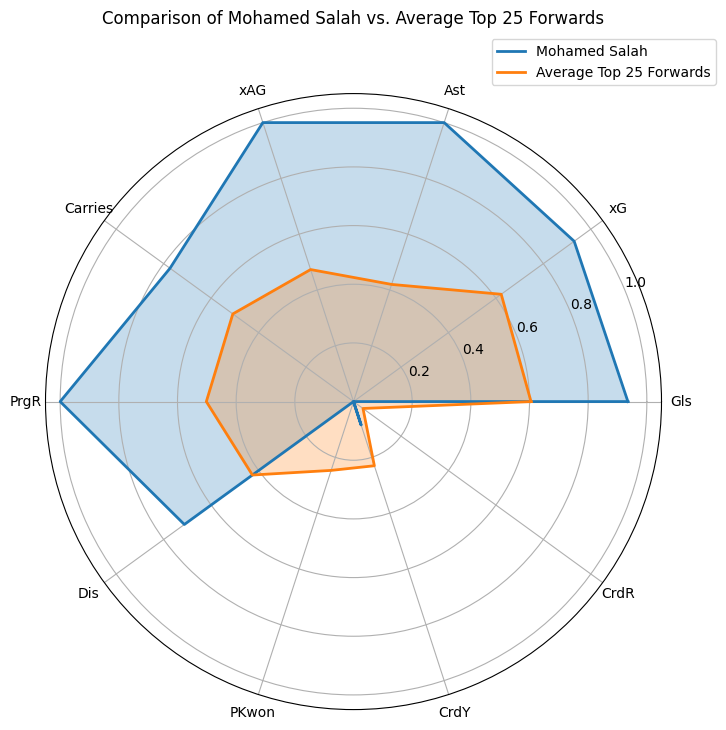

In [464]:
salah = forwards_normalized[forwards_normalized['Player'] == 'Mohamed Salah'].iloc[0]

top_25_forwards = top_25_forwards.sort_values(by='Score', ascending=False).head(25)
avg_top_25_forwards = top_25_forwards[forward_cols].mean()

categories = forward_cols
salah_values = salah[categories].values
avg_values = avg_top_25_forwards[categories].values
num_vars = len(categories)

angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
salah_values = np.concatenate((salah_values, [salah_values[0]]))
avg_values = np.concatenate((avg_values, [avg_values[0]]))
angles = np.concatenate((angles, [angles[0]]))

# Plot the spider chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.plot(angles, salah_values, linewidth=2, linestyle='solid', label='Mohamed Salah')
ax.fill(angles, salah_values, alpha=0.25)
ax.plot(angles, avg_values, linewidth=2, linestyle='solid', label='Average Top 25 Forwards')
ax.fill(angles, avg_values, alpha=0.25)
ax.set_thetagrids(np.degrees(angles[:-1]), categories)
ax.set_title("Comparison of Mohamed Salah vs. Average Top 25 Forwards", y=1.1)
ax.grid(True)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()

**Project Title**: Player of the Season 2024/2025  
**Author**: Muhammad Khoirul Irsyadul Ibad  
**Email**: irulkhoirul414@gmail.com  
**GitHub**: https://github.com/MKHO1RUL

Thank You